# Plain N-BEATS model approach using a customized loss

* This approach uses the plain N-BEATS model, using 12 blocks

In [1]:
import torch
import torch.nn as nn
import numpy as np
from models.nbeats import NBeats
from data import OhioData
import torch.optim as optim
import matplotlib.pyplot as plt

from torch.utils.data import DataLoader
from tqdm import tqdm

# Parameters 

* I just tried out a few parameters
* One can optimize them by using hyper parameter search metrics (baysian parameter optimization)

In [2]:
epochs = 250
n_batches = 1024
input_dim = 24
n_features = 11
n_blocks = 12
output_dim = 12
amount_fc = 3
hidden_dim = 64
early_stopping_counter = 10

lr = 1e-5

# Loading data

In [3]:
device = "cuda:0" if torch.cuda.is_available() else "cpu"

val_data = OhioData(mode="validation", n=output_dim)

train_data = OhioData(n=output_dim)




KeyboardInterrupt



# Utils

* The input is shaped to: (batch size, sequence length * features)
* Because N-BEATS does not only forecasts values but also estimates backcast values
* Therefore [0, :sequence_length] stores the backcast cbg values

In [ ]:
def prepare_data(batch):
    batch = batch.reshape(-1, input_dim, n_features)
    batch_tmp = batch[:, :, 0].clone().detach()
    batch[:, :, 0] = batch[:, :, 2]
    batch[:, :, 2] = batch_tmp
    return batch.permute(0, 2, 1).reshape(-1, input_dim * n_features)
    

# Training loop

In [ ]:
train_loader = DataLoader(train_data, batch_size=n_batches, shuffle=True, num_workers=0)
val_loader = DataLoader(val_data, batch_size=n_batches, shuffle=False, num_workers=0)

model = NBeats(n_blocks=n_blocks, input_dim=input_dim, parameter_dim=n_features, output_dim=output_dim, amount_fc=amount_fc, hidden_dim=hidden_dim).to(device)
optimizer = optim.Adam(model.parameters(), lr=lr)
scheduler = optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.95)
scheduler2 = optim.lr_scheduler.ExponentialLR(optimizer, gamma=.99)

* Plots the prediction and the label of a single example

In [ ]:
def plot_example(y, y_pred, inp, scale_factor=400):
    with torch.no_grad():
        idx_list = list(range(len(inp) + len(y)))
        y_pred *= scale_factor
        inp = np.append(inp, y) * scale_factor
        fig, ax = plt.subplots(1)
        ax.plot(idx_list, inp, label="Input + Label")
        ax.plot(idx_list[-output_dim:], y_pred, label="Predicted Label")
        ax.legend()
        ax.set_title("Predicted vs actual future")
    return fig

## Approach
1. Vizualize prediction of the current model
2. Run model on validation set
3. Train on train data
   
## Notes
* Early stopping is used 
* two separate lr schedulers are used

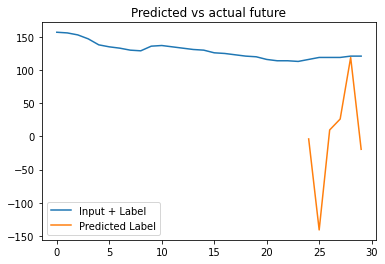

[Training:0] Total Loss: 9.65 Loss: 3.64: 100%|██████████| 95/95 [00:20<00:00,  4.66it/s] 


tensor([0.2633, 0.2454, 0.3388, 0.3269, 0.5418, 0.3760], device='cuda:0',
       grad_fn=<SelectBackward0>) tensor([0.4075, 0.3950, 0.3800, 0.3675, 0.3450, 0.3200], device='cuda:0')


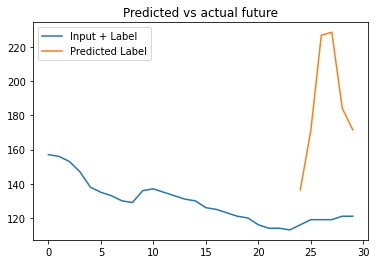

[Training:1] Total Loss: 2.90 Loss: 2.34: 100%|██████████| 95/95 [00:20<00:00,  4.72it/s]


tensor([0.2788, 0.3804, 0.3935, 0.4332, 0.4323, 0.3405], device='cuda:0',
       grad_fn=<SelectBackward0>) tensor([0.2700, 0.2675, 0.2675, 0.2650, 0.2625, 0.2600], device='cuda:0')


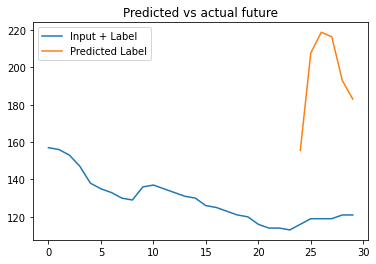

[Training:2] Total Loss: 2.17 Loss: 1.98: 100%|██████████| 95/95 [00:20<00:00,  4.71it/s]


tensor([0.3098, 0.3453, 0.3161, 0.3567, 0.3917, 0.3501], device='cuda:0',
       grad_fn=<SelectBackward0>) tensor([0.2850, 0.2825, 0.2800, 0.2750, 0.2700, 0.2650], device='cuda:0')


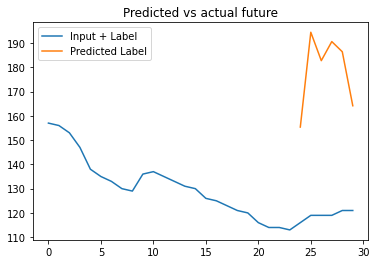

[Training:3] Total Loss: 1.82 Loss: 1.80: 100%|██████████| 95/95 [00:20<00:00,  4.68it/s]


tensor([0.3491, 0.2911, 0.4043, 0.3843, 0.4057, 0.4015], device='cuda:0',
       grad_fn=<SelectBackward0>) tensor([0.2550, 0.2375, 0.2425, 0.2450, 0.2450, 0.2575], device='cuda:0')


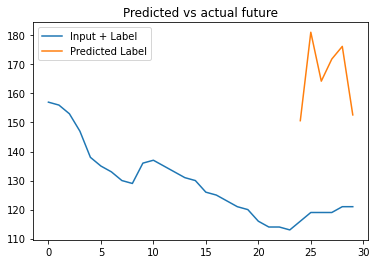

[Training:4] Total Loss: 1.58 Loss: 1.48: 100%|██████████| 95/95 [00:19<00:00,  4.82it/s]


tensor([0.4860, 0.4884, 0.4474, 0.4536, 0.5291, 0.4810], device='cuda:0',
       grad_fn=<SelectBackward0>) tensor([0.5025, 0.5000, 0.4950, 0.4875, 0.4750, 0.4525], device='cuda:0')


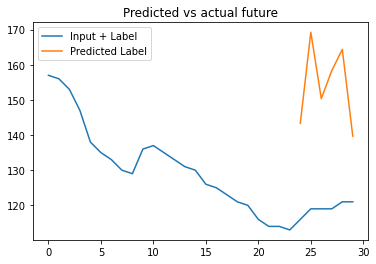

[Training:5] Total Loss: 1.42 Loss: 1.31: 100%|██████████| 95/95 [00:19<00:00,  4.76it/s]


tensor([0.5617, 0.5963, 0.5094, 0.6355, 0.5473, 0.5317], device='cuda:0',
       grad_fn=<SelectBackward0>) tensor([0.9500, 0.9525, 0.9600, 0.9575, 0.9850, 0.9975], device='cuda:0')


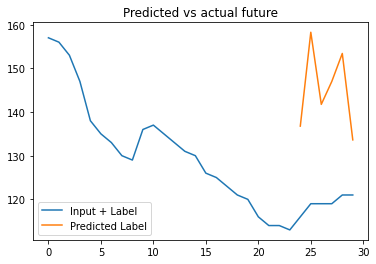

[Training:6] Total Loss: 1.29 Loss: 1.27: 100%|██████████| 95/95 [00:20<00:00,  4.69it/s]


tensor([0.4348, 0.3444, 0.4215, 0.3843, 0.4598, 0.3767], device='cuda:0',
       grad_fn=<SelectBackward0>) tensor([0.4950, 0.5050, 0.5150, 0.5175, 0.5175, 0.5175], device='cuda:0')


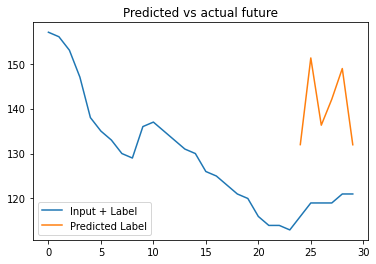

[Training:7] Total Loss: 1.19 Loss: 1.17: 100%|██████████| 95/95 [00:20<00:00,  4.63it/s]


tensor([0.3573, 0.3774, 0.3778, 0.3964, 0.3880, 0.3674], device='cuda:0',
       grad_fn=<SelectBackward0>) tensor([0.3850, 0.3900, 0.3925, 0.3925, 0.3900, 0.3925], device='cuda:0')


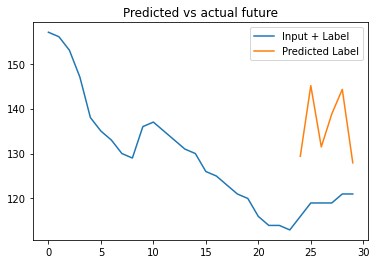

[Training:8] Total Loss: 1.11 Loss: 1.02: 100%|██████████| 95/95 [00:20<00:00,  4.66it/s]


tensor([0.4069, 0.4309, 0.4081, 0.4631, 0.4206, 0.4417], device='cuda:0',
       grad_fn=<SelectBackward0>) tensor([0.5075, 0.5175, 0.5275, 0.5400, 0.5450, 0.5475], device='cuda:0')


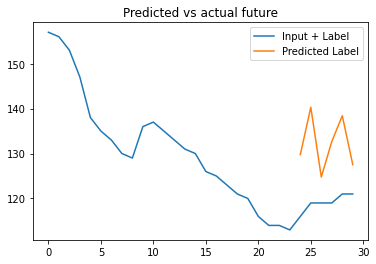

[Training:9] Total Loss: 1.04 Loss: 1.01: 100%|██████████| 95/95 [00:20<00:00,  4.72it/s]


tensor([0.2434, 0.2689, 0.2391, 0.2854, 0.2903, 0.2691], device='cuda:0',
       grad_fn=<SelectBackward0>) tensor([0.2175, 0.2325, 0.2400, 0.2475, 0.2525, 0.2525], device='cuda:0')


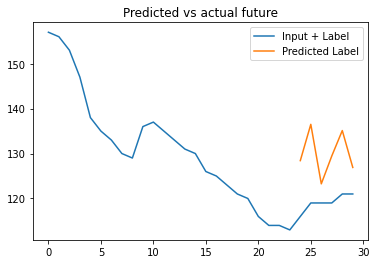

[Training:10] Total Loss: 1.00 Loss: 0.98: 100%|██████████| 95/95 [00:20<00:00,  4.69it/s]


tensor([0.3728, 0.3843, 0.3842, 0.4046, 0.3829, 0.3984], device='cuda:0',
       grad_fn=<SelectBackward0>) tensor([0.5075, 0.5200, 0.5375, 0.5525, 0.5725, 0.5875], device='cuda:0')


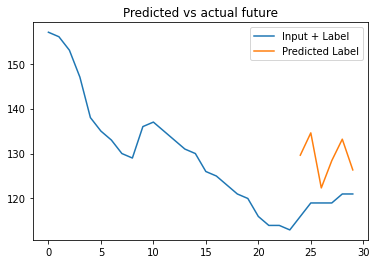

[Training:11] Total Loss: 0.95 Loss: 0.99: 100%|██████████| 95/95 [00:20<00:00,  4.72it/s]


tensor([0.3721, 0.3858, 0.4520, 0.3645, 0.3868, 0.3849], device='cuda:0',
       grad_fn=<SelectBackward0>) tensor([0.5000, 0.5100, 0.5225, 0.5375, 0.5400, 0.5375], device='cuda:0')


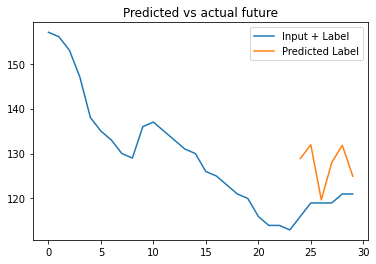

[Training:12] Total Loss: 0.92 Loss: 0.98: 100%|██████████| 95/95 [00:19<00:00,  4.77it/s]


tensor([0.4473, 0.4679, 0.4914, 0.4444, 0.4975, 0.4131], device='cuda:0',
       grad_fn=<SelectBackward0>) tensor([0.4500, 0.4475, 0.4350, 0.4325, 0.4425, 0.4625], device='cuda:0')


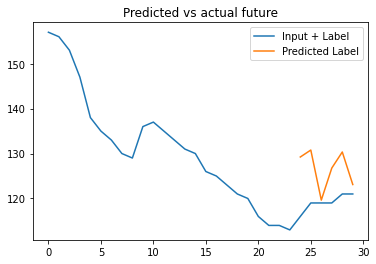

[Training:13] Total Loss: 0.89 Loss: 0.95: 100%|██████████| 95/95 [00:19<00:00,  4.86it/s]


tensor([0.5663, 0.5900, 0.5911, 0.5973, 0.5822, 0.5927], device='cuda:0',
       grad_fn=<SelectBackward0>) tensor([0.8075, 0.8100, 0.8025, 0.8050, 0.8225, 0.8175], device='cuda:0')


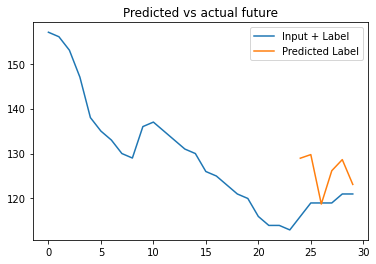

[Training:14] Total Loss: 0.86 Loss: 0.80: 100%|██████████| 95/95 [00:19<00:00,  4.77it/s]


tensor([0.3859, 0.3398, 0.3740, 0.3832, 0.3135, 0.4216], device='cuda:0',
       grad_fn=<SelectBackward0>) tensor([0.3600, 0.3600, 0.3600, 0.3675, 0.3825, 0.3950], device='cuda:0')


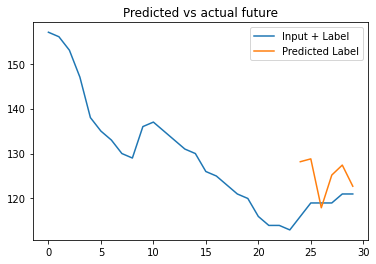

[Training:15] Total Loss: 0.84 Loss: 0.83: 100%|██████████| 95/95 [00:20<00:00,  4.67it/s]


tensor([0.4006, 0.4039, 0.4092, 0.4072, 0.4101, 0.4121], device='cuda:0',
       grad_fn=<SelectBackward0>) tensor([0.4575, 0.4625, 0.4675, 0.4650, 0.4650, 0.4625], device='cuda:0')


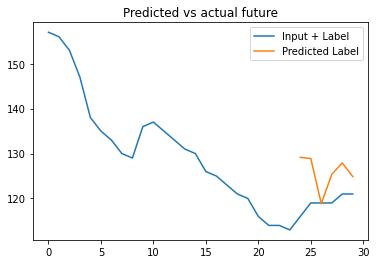

[Training:16] Total Loss: 0.81 Loss: 0.75: 100%|██████████| 95/95 [00:20<00:00,  4.72it/s]


tensor([0.4719, 0.4661, 0.4627, 0.4436, 0.4411, 0.4636], device='cuda:0',
       grad_fn=<SelectBackward0>) tensor([0.4625, 0.4325, 0.3775, 0.3725, 0.3750, 0.3825], device='cuda:0')


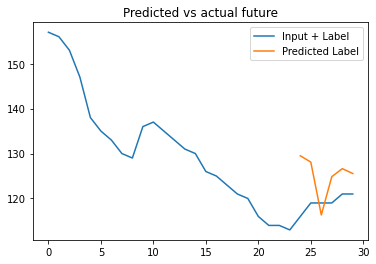

[Training:17] Total Loss: 0.80 Loss: 0.77: 100%|██████████| 95/95 [00:20<00:00,  4.74it/s]


tensor([0.3896, 0.4049, 0.3956, 0.3445, 0.4228, 0.4222], device='cuda:0',
       grad_fn=<SelectBackward0>) tensor([0.4700, 0.4825, 0.4925, 0.4975, 0.5225, 0.5150], device='cuda:0')


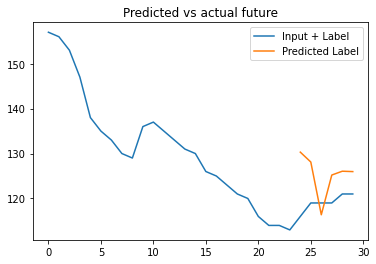

[Training:18] Total Loss: 0.78 Loss: 0.75: 100%|██████████| 95/95 [00:20<00:00,  4.62it/s]


tensor([0.6082, 0.6687, 0.6505, 0.6257, 0.5744, 0.6508], device='cuda:0',
       grad_fn=<SelectBackward0>) tensor([0.5950, 0.5950, 0.6025, 0.6075, 0.6000, 0.6000], device='cuda:0')


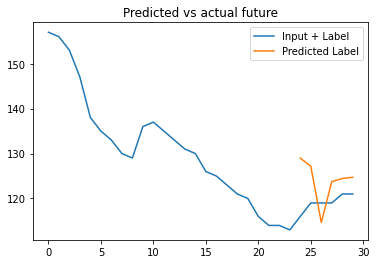

[Training:19] Total Loss: 0.76 Loss: 0.74: 100%|██████████| 95/95 [00:20<00:00,  4.60it/s]


tensor([0.6353, 0.6859, 0.5905, 0.5641, 0.6042, 0.5783], device='cuda:0',
       grad_fn=<SelectBackward0>) tensor([0.6050, 0.5950, 0.5775, 0.5700, 0.5625, 0.5525], device='cuda:0')


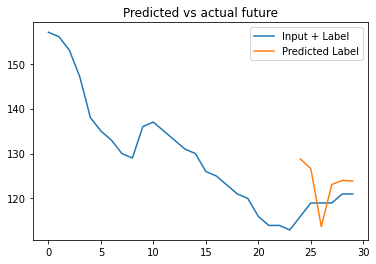

[Training:20] Total Loss: 0.75 Loss: 0.80: 100%|██████████| 95/95 [00:20<00:00,  4.62it/s]


tensor([0.5241, 0.5004, 0.4798, 0.5193, 0.5232, 0.4904], device='cuda:0',
       grad_fn=<SelectBackward0>) tensor([0.5125, 0.5175, 0.5125, 0.5100, 0.5075, 0.5025], device='cuda:0')


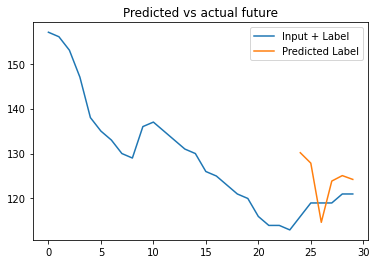

[Training:21] Total Loss: 0.74 Loss: 0.74: 100%|██████████| 95/95 [00:20<00:00,  4.71it/s]


tensor([0.4438, 0.4134, 0.4275, 0.3558, 0.4045, 0.3501], device='cuda:0',
       grad_fn=<SelectBackward0>) tensor([0.3225, 0.3225, 0.3325, 0.3550, 0.3950, 0.4050], device='cuda:0')


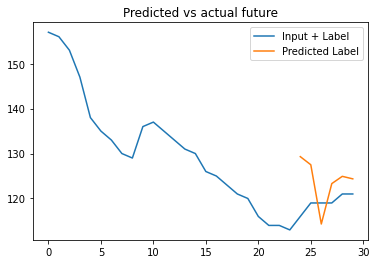

[Training:22] Total Loss: 0.73 Loss: 0.67: 100%|██████████| 95/95 [00:20<00:00,  4.67it/s]


tensor([0.5764, 0.5853, 0.5684, 0.5753, 0.5659, 0.5580], device='cuda:0',
       grad_fn=<SelectBackward0>) tensor([0.5575, 0.5525, 0.5550, 0.5600, 0.5500, 0.5325], device='cuda:0')


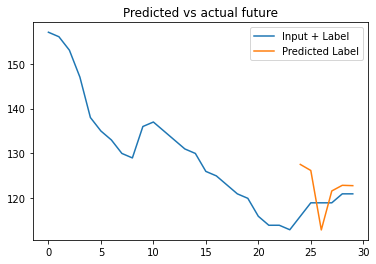

[Training:23] Total Loss: 0.72 Loss: 0.82: 100%|██████████| 95/95 [00:19<00:00,  4.88it/s]


tensor([0.6536, 0.6657, 0.6590, 0.6813, 0.6726, 0.6510], device='cuda:0',
       grad_fn=<SelectBackward0>) tensor([0.7125, 0.7150, 0.7050, 0.7000, 0.7050, 0.7125], device='cuda:0')


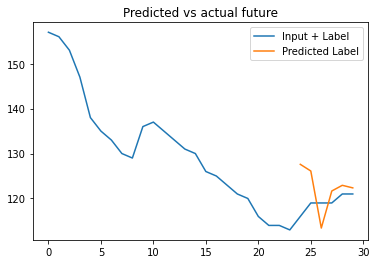

[Training:24] Total Loss: 0.71 Loss: 0.69: 100%|██████████| 95/95 [00:20<00:00,  4.71it/s]


tensor([0.4061, 0.4041, 0.3917, 0.4028, 0.3988, 0.3869], device='cuda:0',
       grad_fn=<SelectBackward0>) tensor([0.4575, 0.4675, 0.4775, 0.4875, 0.5025, 0.5150], device='cuda:0')


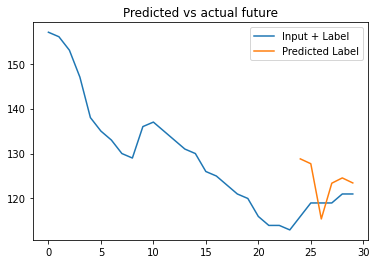

[Training:25] Total Loss: 0.70 Loss: 0.69: 100%|██████████| 95/95 [00:20<00:00,  4.74it/s]


tensor([0.3935, 0.3502, 0.3789, 0.3497, 0.3626, 0.3820], device='cuda:0',
       grad_fn=<SelectBackward0>) tensor([0.2600, 0.2850, 0.3050, 0.3100, 0.3125, 0.3125], device='cuda:0')


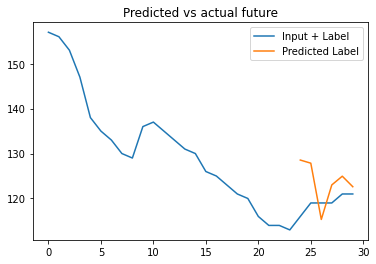

[Training:26] Total Loss: 0.69 Loss: 0.67: 100%|██████████| 95/95 [00:20<00:00,  4.73it/s]


tensor([0.4143, 0.3955, 0.4196, 0.4481, 0.4535, 0.4074], device='cuda:0',
       grad_fn=<SelectBackward0>) tensor([0.4825, 0.4750, 0.4675, 0.4650, 0.4700, 0.4750], device='cuda:0')


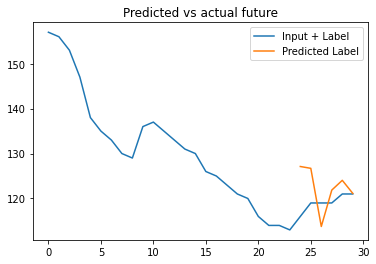

[Training:27] Total Loss: 0.68 Loss: 0.68: 100%|██████████| 95/95 [00:19<00:00,  4.79it/s]


tensor([0.4442, 0.5041, 0.4552, 0.4674, 0.4855, 0.4418], device='cuda:0',
       grad_fn=<SelectBackward0>) tensor([0.3750, 0.3550, 0.3450, 0.3450, 0.3475, 0.3575], device='cuda:0')


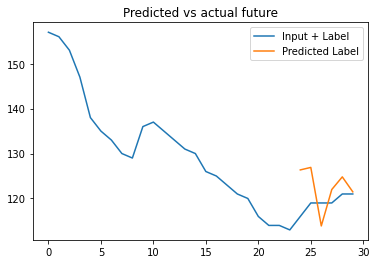

[Training:28] Total Loss: 0.67 Loss: 0.72: 100%|██████████| 95/95 [00:20<00:00,  4.64it/s]


tensor([0.1774, 0.1915, 0.2093, 0.2103, 0.1847, 0.2380], device='cuda:0',
       grad_fn=<SelectBackward0>) tensor([0.2100, 0.2125, 0.2200, 0.2225, 0.2225, 0.2225], device='cuda:0')


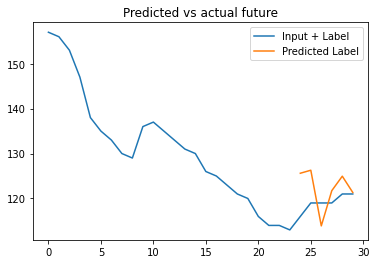

[Training:29] Total Loss: 0.66 Loss: 0.60: 100%|██████████| 95/95 [00:20<00:00,  4.58it/s]


tensor([0.2363, 0.2292, 0.2355, 0.2383, 0.2498, 0.2500], device='cuda:0',
       grad_fn=<SelectBackward0>) tensor([0.2075, 0.2025, 0.2000, 0.2000, 0.2000, 0.1975], device='cuda:0')


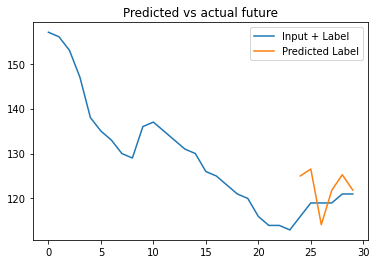

[Training:30] Total Loss: 0.66 Loss: 0.63: 100%|██████████| 95/95 [00:20<00:00,  4.73it/s]


tensor([0.5956, 0.5846, 0.5661, 0.5845, 0.5729, 0.5645], device='cuda:0',
       grad_fn=<SelectBackward0>) tensor([0.5775, 0.5725, 0.5600, 0.5450, 0.5375, 0.5250], device='cuda:0')


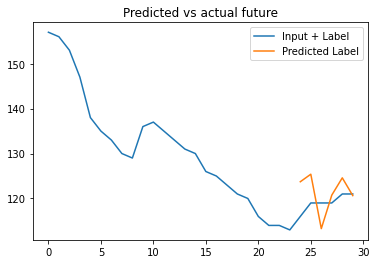

[Training:31] Total Loss: 0.65 Loss: 0.64: 100%|██████████| 95/95 [00:20<00:00,  4.65it/s]


tensor([0.4187, 0.4119, 0.4191, 0.4207, 0.4090, 0.4261], device='cuda:0',
       grad_fn=<SelectBackward0>) tensor([0.5075, 0.5200, 0.5375, 0.5525, 0.5725, 0.5875], device='cuda:0')


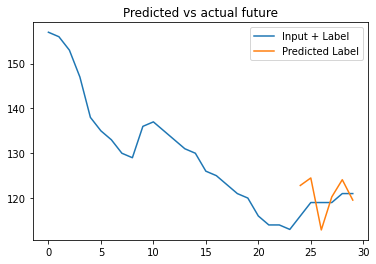

[Training:32] Total Loss: 0.65 Loss: 0.65: 100%|██████████| 95/95 [00:20<00:00,  4.61it/s]


tensor([0.4046, 0.4022, 0.4840, 0.4294, 0.3963, 0.4367], device='cuda:0',
       grad_fn=<SelectBackward0>) tensor([0.5175, 0.5225, 0.5350, 0.5350, 0.5275, 0.5250], device='cuda:0')


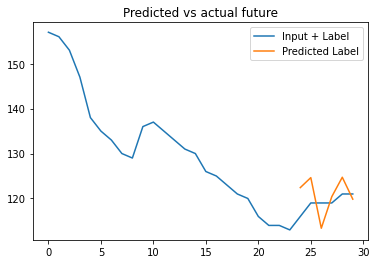

[Training:33] Total Loss: 0.64 Loss: 0.61: 100%|██████████| 95/95 [00:20<00:00,  4.71it/s]


tensor([0.5952, 0.6191, 0.5735, 0.5645, 0.5516, 0.5527], device='cuda:0',
       grad_fn=<SelectBackward0>) tensor([0.6100, 0.6050, 0.6025, 0.5950, 0.5900, 0.5825], device='cuda:0')


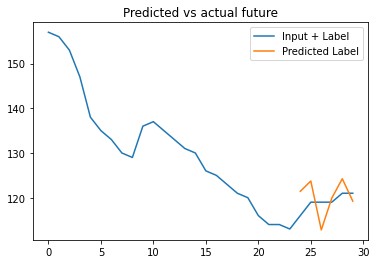

[Training:34] Total Loss: 0.64 Loss: 0.66: 100%|██████████| 95/95 [00:19<00:00,  4.77it/s]


tensor([0.6518, 0.6505, 0.6503, 0.6626, 0.6281, 0.6439], device='cuda:0',
       grad_fn=<SelectBackward0>) tensor([0.7575, 0.7525, 0.7550, 0.7525, 0.7475, 0.7500], device='cuda:0')


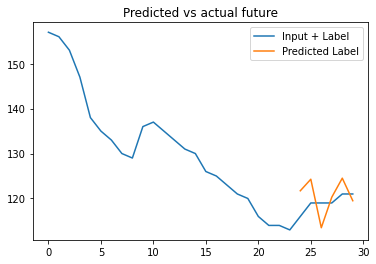

[Training:35] Total Loss: 0.63 Loss: 0.62: 100%|██████████| 95/95 [00:19<00:00,  4.76it/s]


tensor([0.4953, 0.4957, 0.4939, 0.4939, 0.4902, 0.4929], device='cuda:0',
       grad_fn=<SelectBackward0>) tensor([0.5250, 0.5250, 0.5225, 0.5225, 0.5225, 0.5225], device='cuda:0')


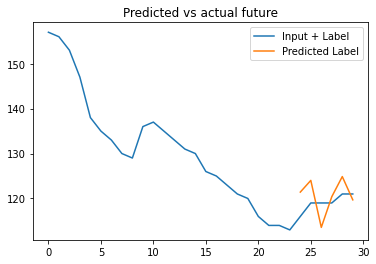

[Training:36] Total Loss: 0.63 Loss: 0.64: 100%|██████████| 95/95 [00:20<00:00,  4.69it/s]


tensor([0.5157, 0.5015, 0.4940, 0.5003, 0.4904, 0.5059], device='cuda:0',
       grad_fn=<SelectBackward0>) tensor([0.5700, 0.5750, 0.5800, 0.5800, 0.5825, 0.5825], device='cuda:0')


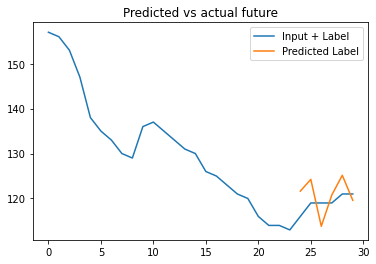

[Training:37] Total Loss: 0.62 Loss: 0.63: 100%|██████████| 95/95 [00:20<00:00,  4.74it/s]


tensor([0.5302, 0.5291, 0.5079, 0.5118, 0.5008, 0.5046], device='cuda:0',
       grad_fn=<SelectBackward0>) tensor([0.5375, 0.5325, 0.5350, 0.5375, 0.5475, 0.5550], device='cuda:0')


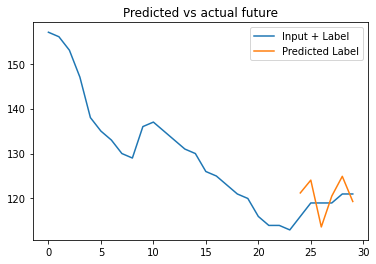

[Training:38] Total Loss: 0.62 Loss: 0.58: 100%|██████████| 95/95 [00:19<00:00,  4.81it/s]


tensor([0.3205, 0.3219, 0.3212, 0.3263, 0.3239, 0.3289], device='cuda:0',
       grad_fn=<SelectBackward0>) tensor([0.3325, 0.3325, 0.3325, 0.3300, 0.3300, 0.3300], device='cuda:0')


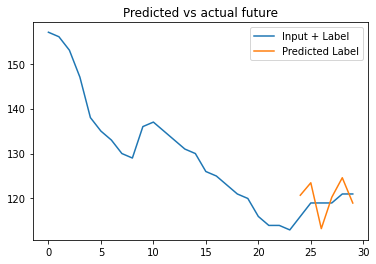

[Training:39] Total Loss: 0.61 Loss: 0.59: 100%|██████████| 95/95 [00:20<00:00,  4.63it/s]


tensor([0.4564, 0.5182, 0.4506, 0.4608, 0.4587, 0.4417], device='cuda:0',
       grad_fn=<SelectBackward0>) tensor([0.4800, 0.4850, 0.5200, 0.5425, 0.5500, 0.5675], device='cuda:0')


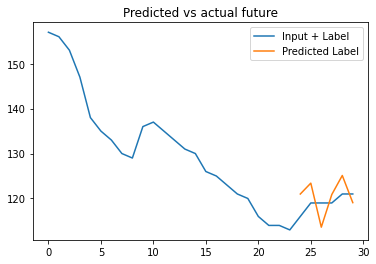

[Training:40] Total Loss: 0.61 Loss: 0.60: 100%|██████████| 95/95 [00:20<00:00,  4.64it/s]


tensor([0.3101, 0.3236, 0.3051, 0.3007, 0.3038, 0.3072], device='cuda:0',
       grad_fn=<SelectBackward0>) tensor([0.2600, 0.2475, 0.2450, 0.2225, 0.2200, 0.2200], device='cuda:0')


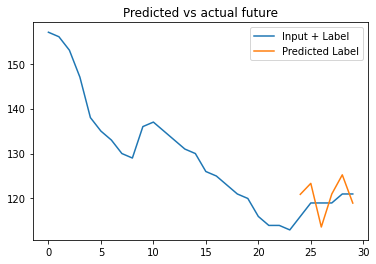

[Training:41] Total Loss: 0.61 Loss: 0.58: 100%|██████████| 95/95 [00:19<00:00,  4.77it/s]


tensor([0.2068, 0.2111, 0.2408, 0.2292, 0.1962, 0.2688], device='cuda:0',
       grad_fn=<SelectBackward0>) tensor([0.1600, 0.1525, 0.1500, 0.1475, 0.1450, 0.1425], device='cuda:0')


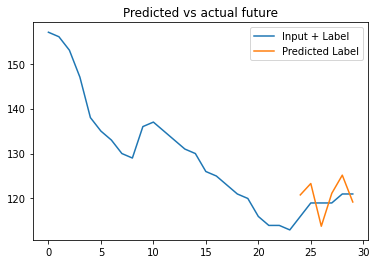

[Training:42] Total Loss: 0.60 Loss: 0.63: 100%|██████████| 95/95 [00:19<00:00,  4.82it/s]


tensor([0.2792, 0.2716, 0.2601, 0.2624, 0.2645, 0.2973], device='cuda:0',
       grad_fn=<SelectBackward0>) tensor([0.3225, 0.3375, 0.3525, 0.3675, 0.3825, 0.3975], device='cuda:0')


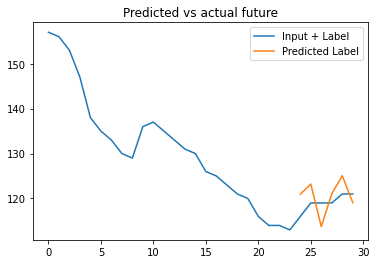

[Training:43] Total Loss: 0.60 Loss: 0.60: 100%|██████████| 95/95 [00:20<00:00,  4.72it/s]


tensor([0.1929, 0.1809, 0.2401, 0.1808, 0.1889, 0.2380], device='cuda:0',
       grad_fn=<SelectBackward0>) tensor([0.1725, 0.1800, 0.1925, 0.2075, 0.2225, 0.2400], device='cuda:0')


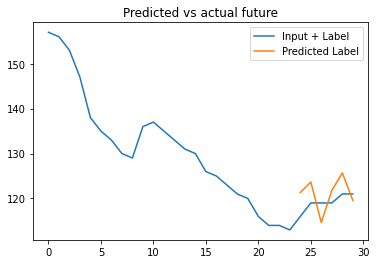

[Training:44] Total Loss: 0.60 Loss: 0.66: 100%|██████████| 95/95 [00:20<00:00,  4.64it/s]


tensor([0.4236, 0.4134, 0.4041, 0.4010, 0.4151, 0.4056], device='cuda:0',
       grad_fn=<SelectBackward0>) tensor([0.4300, 0.4325, 0.4325, 0.4300, 0.4275, 0.4250], device='cuda:0')


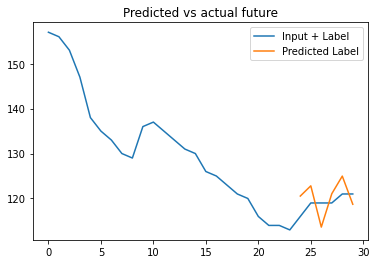

[Training:45] Total Loss: 0.60 Loss: 0.62: 100%|██████████| 95/95 [00:20<00:00,  4.70it/s]


tensor([0.6947, 0.7023, 0.6802, 0.6778, 0.6586, 0.6580], device='cuda:0',
       grad_fn=<SelectBackward0>) tensor([0.6650, 0.6600, 0.6525, 0.6475, 0.6400, 0.6275], device='cuda:0')


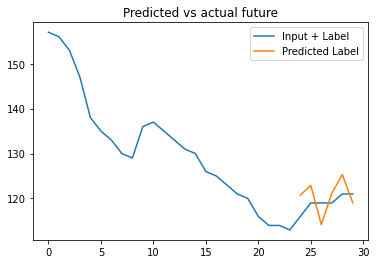

[Training:46] Total Loss: 0.59 Loss: 0.54: 100%|██████████| 95/95 [00:20<00:00,  4.68it/s]


tensor([0.2963, 0.3239, 0.3145, 0.2461, 0.2760, 0.2778], device='cuda:0',
       grad_fn=<SelectBackward0>) tensor([0.2950, 0.3200, 0.3450, 0.3725, 0.3725, 0.3650], device='cuda:0')


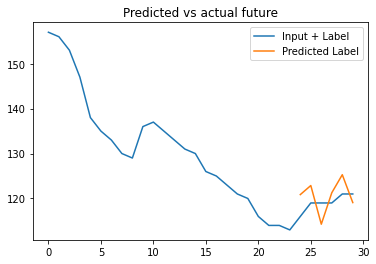

[Training:47] Total Loss: 0.59 Loss: 0.55: 100%|██████████| 95/95 [00:20<00:00,  4.64it/s]


tensor([0.4840, 0.4815, 0.4715, 0.4652, 0.4722, 0.4693], device='cuda:0',
       grad_fn=<SelectBackward0>) tensor([0.5075, 0.5100, 0.5075, 0.5075, 0.5025, 0.5025], device='cuda:0')


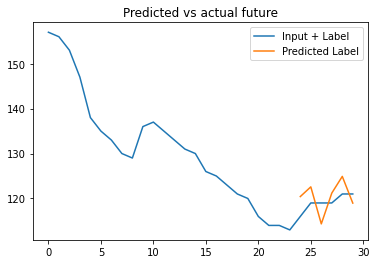

[Training:48] Total Loss: 0.59 Loss: 0.65: 100%|██████████| 95/95 [00:20<00:00,  4.73it/s]

tensor([0.3258, 0.3152, 0.3230, 0.3099, 0.3187, 0.3162], device='cuda:0',
       grad_fn=<SelectBackward0>) tensor([0.3125, 0.3150, 0.3300, 0.3525, 0.3600, 0.3600], device='cuda:0')


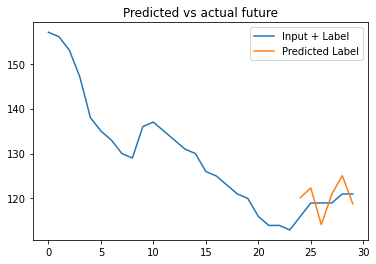

[Training:49] Total Loss: 0.59 Loss: 0.56: 100%|██████████| 95/95 [00:20<00:00,  4.64it/s]


tensor([0.3930, 0.4368, 0.4409, 0.4006, 0.4322, 0.3935], device='cuda:0',
       grad_fn=<SelectBackward0>) tensor([0.3725, 0.3650, 0.3525, 0.3400, 0.3225, 0.3175], device='cuda:0')


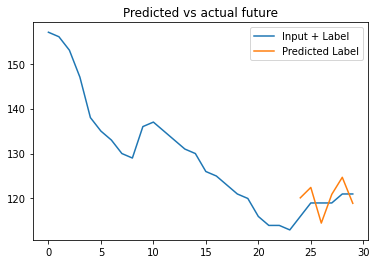

[Training:50] Total Loss: 0.58 Loss: 0.56: 100%|██████████| 95/95 [00:20<00:00,  4.69it/s]


tensor([0.3210, 0.3262, 0.3243, 0.3276, 0.3335, 0.3292], device='cuda:0',
       grad_fn=<SelectBackward0>) tensor([0.3225, 0.3250, 0.3425, 0.3700, 0.4050, 0.4450], device='cuda:0')


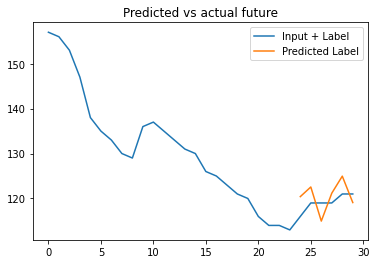

[Training:51] Total Loss: 0.58 Loss: 0.59: 100%|██████████| 95/95 [00:19<00:00,  4.75it/s]


tensor([0.5584, 0.5606, 0.5389, 0.5434, 0.5301, 0.5406], device='cuda:0',
       grad_fn=<SelectBackward0>) tensor([0.5575, 0.5600, 0.5625, 0.5625, 0.5575, 0.5575], device='cuda:0')


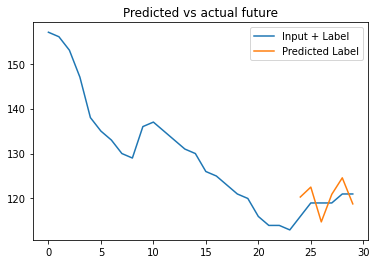

[Training:52] Total Loss: 0.58 Loss: 0.61: 100%|██████████| 95/95 [00:20<00:00,  4.69it/s]


tensor([0.4636, 0.4611, 0.5172, 0.5304, 0.5103, 0.5075], device='cuda:0',
       grad_fn=<SelectBackward0>) tensor([0.5750, 0.5925, 0.6175, 0.6325, 0.6375, 0.6375], device='cuda:0')


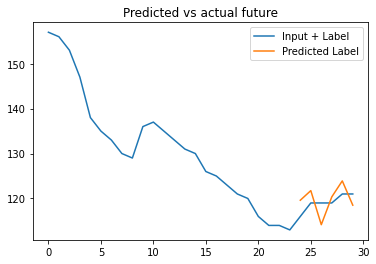

[Training:53] Total Loss: 0.58 Loss: 0.51: 100%|██████████| 95/95 [00:20<00:00,  4.68it/s]


tensor([0.2843, 0.3075, 0.3294, 0.3043, 0.3231, 0.3246], device='cuda:0',
       grad_fn=<SelectBackward0>) tensor([0.4600, 0.4725, 0.4800, 0.4850, 0.4950, 0.5025], device='cuda:0')


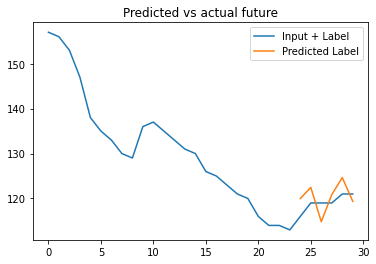

[Training:54] Total Loss: 0.58 Loss: 0.57: 100%|██████████| 95/95 [00:20<00:00,  4.75it/s]


tensor([0.4159, 0.4338, 0.4464, 0.3906, 0.3771, 0.3878], device='cuda:0',
       grad_fn=<SelectBackward0>) tensor([0.4300, 0.3900, 0.3925, 0.4000, 0.4075, 0.4075], device='cuda:0')


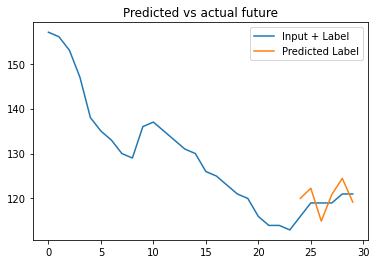

[Training:55] Total Loss: 0.58 Loss: 0.58: 100%|██████████| 95/95 [00:19<00:00,  4.82it/s]

tensor([0.2995, 0.3052, 0.2954, 0.2818, 0.2979, 0.3072], device='cuda:0',
       grad_fn=<SelectBackward0>) tensor([0.2350, 0.2125, 0.2075, 0.2225, 0.2800, 0.3400], device='cuda:0')


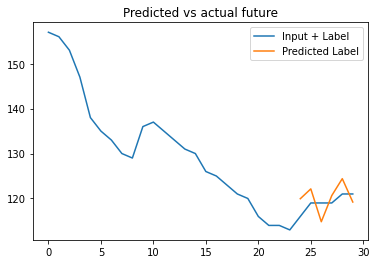

[Training:56] Total Loss: 0.57 Loss: 0.56: 100%|██████████| 95/95 [00:19<00:00,  4.79it/s]


tensor([0.4524, 0.4562, 0.4691, 0.4827, 0.4656, 0.4194], device='cuda:0',
       grad_fn=<SelectBackward0>) tensor([0.4450, 0.4200, 0.3975, 0.3775, 0.3400, 0.3175], device='cuda:0')


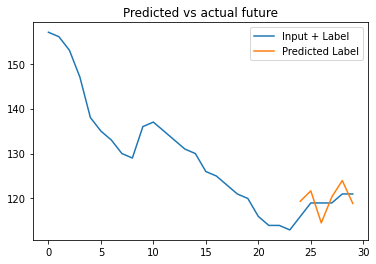

[Training:57] Total Loss: 0.57 Loss: 0.53: 100%|██████████| 95/95 [00:20<00:00,  4.72it/s]


tensor([0.2550, 0.2712, 0.2326, 0.2238, 0.2409, 0.2615], device='cuda:0',
       grad_fn=<SelectBackward0>) tensor([0.2200, 0.2200, 0.2175, 0.2175, 0.2075, 0.2025], device='cuda:0')


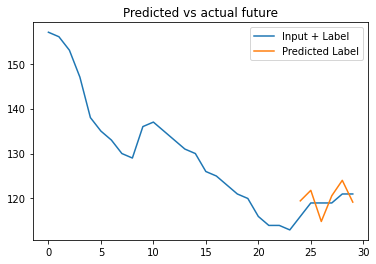

[Training:58] Total Loss: 0.57 Loss: 0.54: 100%|██████████| 95/95 [00:19<00:00,  4.77it/s]


tensor([0.3084, 0.2920, 0.2701, 0.3019, 0.3360, 0.2932], device='cuda:0',
       grad_fn=<SelectBackward0>) tensor([0.2800, 0.2775, 0.2750, 0.2725, 0.2725, 0.2675], device='cuda:0')


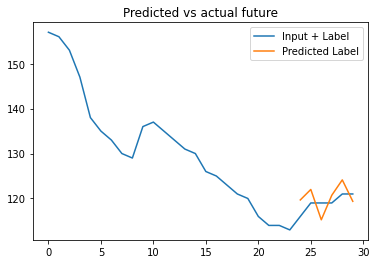

[Training:59] Total Loss: 0.57 Loss: 0.56: 100%|██████████| 95/95 [00:19<00:00,  4.77it/s]


tensor([0.3807, 0.3795, 0.3628, 0.3728, 0.3665, 0.3764], device='cuda:0',
       grad_fn=<SelectBackward0>) tensor([0.3725, 0.3700, 0.3675, 0.3625, 0.3575, 0.3550], device='cuda:0')


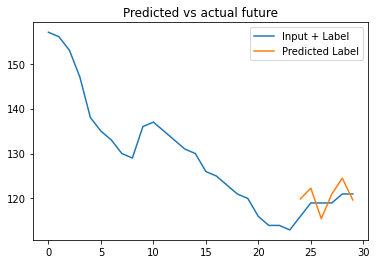

[Training:60] Total Loss: 0.57 Loss: 0.57: 100%|██████████| 95/95 [00:19<00:00,  4.79it/s]


tensor([0.4541, 0.4896, 0.4950, 0.4918, 0.4345, 0.4504], device='cuda:0',
       grad_fn=<SelectBackward0>) tensor([0.5450, 0.5400, 0.5325, 0.5300, 0.5300, 0.5300], device='cuda:0')


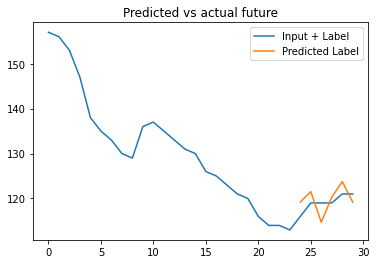

[Training:61] Total Loss: 0.57 Loss: 0.59: 100%|██████████| 95/95 [00:19<00:00,  4.95it/s]


tensor([0.4185, 0.4109, 0.4446, 0.4541, 0.5014, 0.4353], device='cuda:0',
       grad_fn=<SelectBackward0>) tensor([0.3700, 0.3700, 0.3725, 0.3600, 0.3525, 0.3450], device='cuda:0')


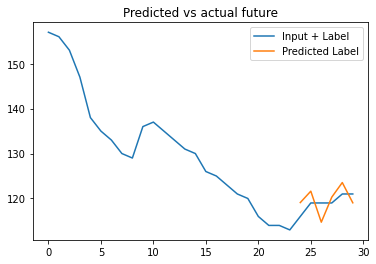

[Training:62] Total Loss: 0.57 Loss: 0.57: 100%|██████████| 95/95 [00:19<00:00,  4.79it/s]


tensor([0.2342, 0.2919, 0.3193, 0.2448, 0.2648, 0.2970], device='cuda:0',
       grad_fn=<SelectBackward0>) tensor([0.3075, 0.3250, 0.3275, 0.3275, 0.3275, 0.3250], device='cuda:0')


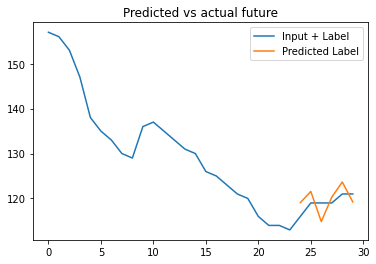

[Training:63] Total Loss: 0.57 Loss: 0.50: 100%|██████████| 95/95 [00:19<00:00,  4.82it/s]


tensor([0.2109, 0.2140, 0.2385, 0.2589, 0.2202, 0.2520], device='cuda:0',
       grad_fn=<SelectBackward0>) tensor([0.1950, 0.2000, 0.2125, 0.2250, 0.2350, 0.2450], device='cuda:0')


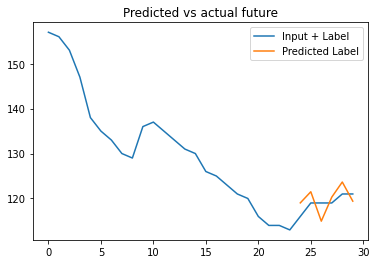

[Training:64] Total Loss: 0.57 Loss: 0.58: 100%|██████████| 95/95 [00:18<00:00,  5.06it/s]

tensor([0.5753, 0.5759, 0.5229, 0.5378, 0.5091, 0.5713], device='cuda:0',
       grad_fn=<SelectBackward0>) tensor([0.5875, 0.5850, 0.5775, 0.5775, 0.5725, 0.5800], device='cuda:0')


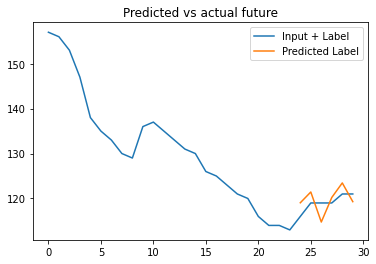

[Training:65] Total Loss: 0.56 Loss: 0.57: 100%|██████████| 95/95 [00:20<00:00,  4.74it/s]


tensor([0.5393, 0.5374, 0.5368, 0.5013, 0.5777, 0.5778], device='cuda:0',
       grad_fn=<SelectBackward0>) tensor([0.4250, 0.3900, 0.3725, 0.3675, 0.3675, 0.3500], device='cuda:0')


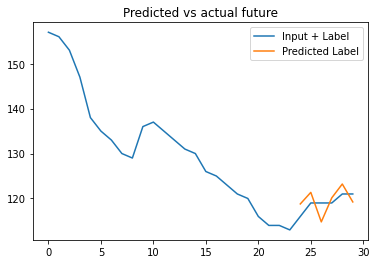

[Training:66] Total Loss: 0.56 Loss: 0.57: 100%|██████████| 95/95 [00:19<00:00,  4.83it/s]


tensor([0.5024, 0.4796, 0.4832, 0.5032, 0.4803, 0.4501], device='cuda:0',
       grad_fn=<SelectBackward0>) tensor([0.4400, 0.4225, 0.4075, 0.4025, 0.4025, 0.4050], device='cuda:0')


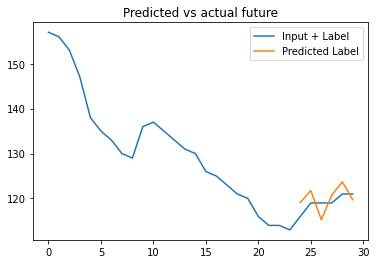

[Training:67] Total Loss: 0.56 Loss: 0.55: 100%|██████████| 95/95 [00:19<00:00,  4.77it/s]


tensor([0.3152, 0.3136, 0.3177, 0.3182, 0.3385, 0.3210], device='cuda:0',
       grad_fn=<SelectBackward0>) tensor([0.4000, 0.4175, 0.4225, 0.4075, 0.3950, 0.3900], device='cuda:0')


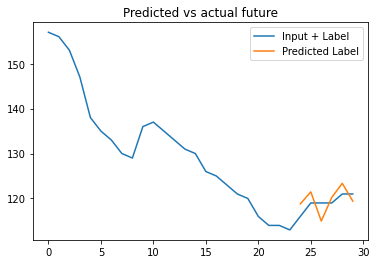

[Training:68] Total Loss: 0.56 Loss: 0.56: 100%|██████████| 95/95 [00:19<00:00,  4.82it/s]


tensor([0.4647, 0.4956, 0.5328, 0.4496, 0.5591, 0.4504], device='cuda:0',
       grad_fn=<SelectBackward0>) tensor([0.4300, 0.4375, 0.4525, 0.4375, 0.4275, 0.4225], device='cuda:0')


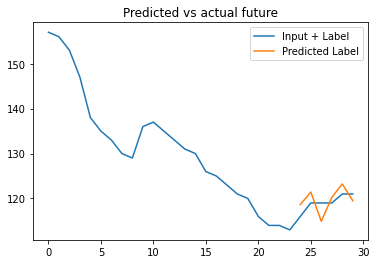

[Training:69] Total Loss: 0.56 Loss: 0.58: 100%|██████████| 95/95 [00:19<00:00,  4.86it/s]


tensor([0.3790, 0.3841, 0.3807, 0.3909, 0.3848, 0.3869], device='cuda:0',
       grad_fn=<SelectBackward0>) tensor([0.3800, 0.3800, 0.3825, 0.3850, 0.3850, 0.3775], device='cuda:0')


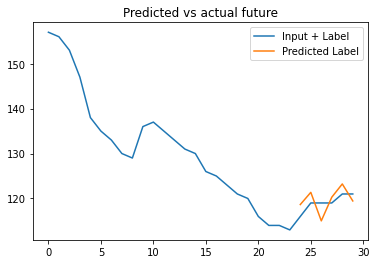

[Training:70] Total Loss: 0.56 Loss: 0.58: 100%|██████████| 95/95 [00:20<00:00,  4.70it/s]


tensor([0.3387, 0.3157, 0.3644, 0.3125, 0.3499, 0.3235], device='cuda:0',
       grad_fn=<SelectBackward0>) tensor([0.3500, 0.3425, 0.3375, 0.3350, 0.3450, 0.3450], device='cuda:0')


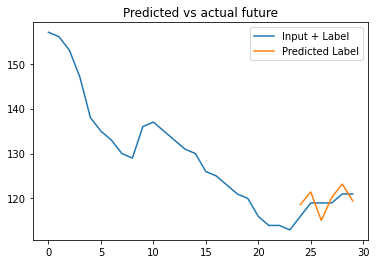

[Training:71] Total Loss: 0.56 Loss: 0.57: 100%|██████████| 95/95 [00:19<00:00,  4.84it/s]


tensor([0.3291, 0.3274, 0.3211, 0.3163, 0.3226, 0.3268], device='cuda:0',
       grad_fn=<SelectBackward0>) tensor([0.3075, 0.3025, 0.2975, 0.2925, 0.2850, 0.2800], device='cuda:0')


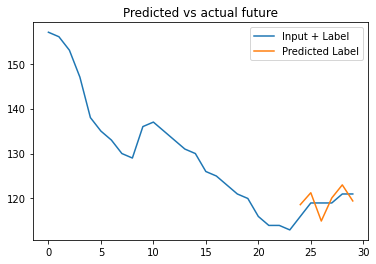

[Training:72] Total Loss: 0.56 Loss: 0.61: 100%|██████████| 95/95 [00:19<00:00,  4.85it/s]


tensor([0.3773, 0.3825, 0.3596, 0.3516, 0.3652, 0.3650], device='cuda:0',
       grad_fn=<SelectBackward0>) tensor([0.3500, 0.3650, 0.3700, 0.3675, 0.3650, 0.3525], device='cuda:0')


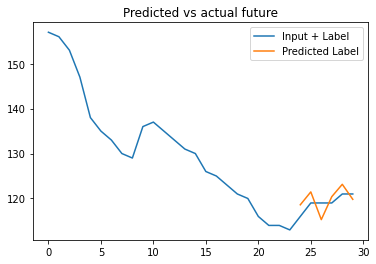

[Training:73] Total Loss: 0.56 Loss: 0.54: 100%|██████████| 95/95 [00:20<00:00,  4.75it/s]


tensor([0.3684, 0.3626, 0.3531, 0.3581, 0.3621, 0.3595], device='cuda:0',
       grad_fn=<SelectBackward0>) tensor([0.3625, 0.3675, 0.3750, 0.3825, 0.3875, 0.3950], device='cuda:0')


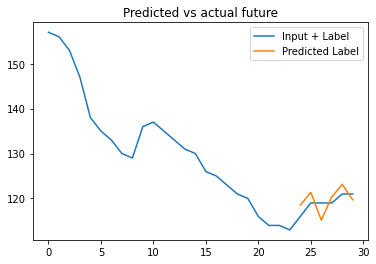

[Training:74] Total Loss: 0.56 Loss: 0.57: 100%|██████████| 95/95 [00:19<00:00,  4.79it/s]


tensor([0.5185, 0.5097, 0.4844, 0.4992, 0.4787, 0.4884], device='cuda:0',
       grad_fn=<SelectBackward0>) tensor([0.4625, 0.4400, 0.4375, 0.4325, 0.4175, 0.4025], device='cuda:0')


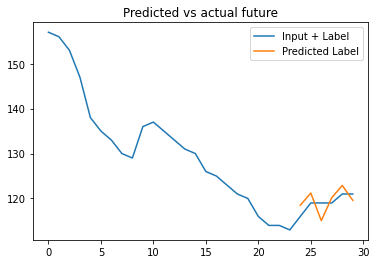

[Training:75] Total Loss: 0.56 Loss: 0.51: 100%|██████████| 95/95 [00:19<00:00,  4.79it/s]


tensor([0.4809, 0.4831, 0.4782, 0.4750, 0.4766, 0.4763], device='cuda:0',
       grad_fn=<SelectBackward0>) tensor([0.4900, 0.4900, 0.4875, 0.4825, 0.4750, 0.4300], device='cuda:0')


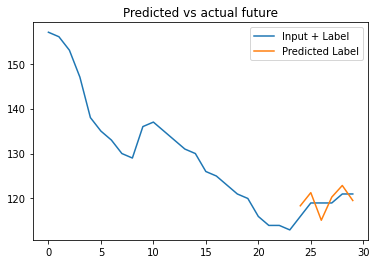

[Training:76] Total Loss: 0.56 Loss: 0.52: 100%|██████████| 95/95 [00:19<00:00,  4.80it/s]


tensor([0.6607, 0.6348, 0.6169, 0.6482, 0.6128, 0.5800], device='cuda:0',
       grad_fn=<SelectBackward0>) tensor([0.4475, 0.4825, 0.5250, 0.5500, 0.5525, 0.5425], device='cuda:0')


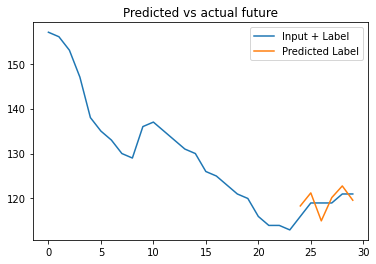

[Training:77] Total Loss: 0.56 Loss: 0.60: 100%|██████████| 95/95 [00:19<00:00,  4.83it/s]

tensor([0.3028, 0.3088, 0.3049, 0.2985, 0.3067, 0.3084], device='cuda:0',
       grad_fn=<SelectBackward0>) tensor([0.2700, 0.2700, 0.2650, 0.2600, 0.2625, 0.2700], device='cuda:0')


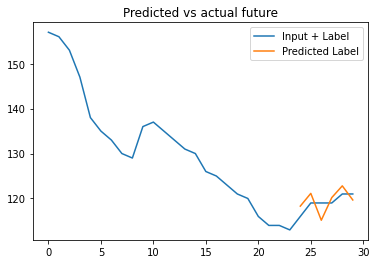

[Training:78] Total Loss: 0.56 Loss: 0.53: 100%|██████████| 95/95 [00:20<00:00,  4.71it/s]


tensor([0.4458, 0.4671, 0.4122, 0.4403, 0.4444, 0.4468], device='cuda:0',
       grad_fn=<SelectBackward0>) tensor([0.3625, 0.3350, 0.3100, 0.2900, 0.2725, 0.2600], device='cuda:0')


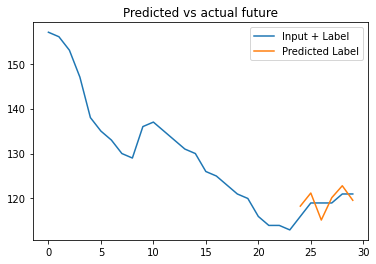

[Training:79] Total Loss: 0.56 Loss: 0.55: 100%|██████████| 95/95 [00:19<00:00,  4.89it/s]


tensor([0.2513, 0.2677, 0.2535, 0.2797, 0.2808, 0.3160], device='cuda:0',
       grad_fn=<SelectBackward0>) tensor([0.2775, 0.2775, 0.2825, 0.2875, 0.3075, 0.3150], device='cuda:0')


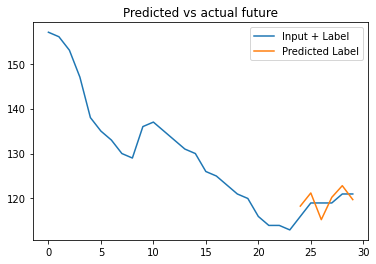

[Training:80] Total Loss: 0.56 Loss: 0.56: 100%|██████████| 95/95 [00:19<00:00,  4.78it/s]


tensor([0.2218, 0.2065, 0.2174, 0.2393, 0.2506, 0.2387], device='cuda:0',
       grad_fn=<SelectBackward0>) tensor([0.2225, 0.2250, 0.2275, 0.2325, 0.2350, 0.2425], device='cuda:0')


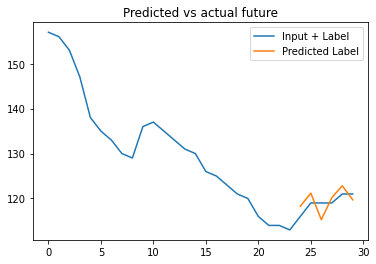

[Training:81] Total Loss: 0.56 Loss: 0.55: 100%|██████████| 95/95 [00:20<00:00,  4.74it/s]


tensor([0.2151, 0.2098, 0.2173, 0.2152, 0.2273, 0.2354], device='cuda:0',
       grad_fn=<SelectBackward0>) tensor([0.2600, 0.2825, 0.2975, 0.3150, 0.3350, 0.3500], device='cuda:0')


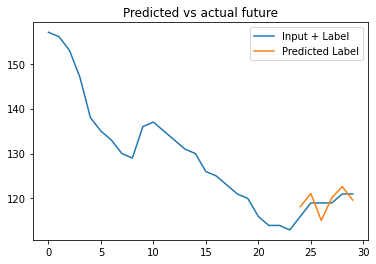

[Training:82] Total Loss: 0.56 Loss: 0.59: 100%|██████████| 95/95 [00:20<00:00,  4.71it/s]


tensor([0.5229, 0.5218, 0.4945, 0.5258, 0.5506, 0.5100], device='cuda:0',
       grad_fn=<SelectBackward0>) tensor([0.5650, 0.5725, 0.5750, 0.5725, 0.5675, 0.5625], device='cuda:0')


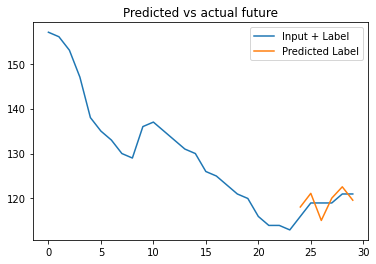

[Training:83] Total Loss: 0.56 Loss: 0.58: 100%|██████████| 95/95 [00:20<00:00,  4.67it/s]


tensor([0.3188, 0.3557, 0.3298, 0.3356, 0.3601, 0.3905], device='cuda:0',
       grad_fn=<SelectBackward0>) tensor([0.2950, 0.2875, 0.2825, 0.2750, 0.2725, 0.2650], device='cuda:0')


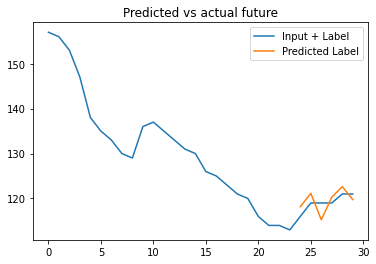

[Training:84] Total Loss: 0.55 Loss: 0.55: 100%|██████████| 95/95 [00:20<00:00,  4.67it/s]


tensor([0.4433, 0.4315, 0.4280, 0.4277, 0.4279, 0.4301], device='cuda:0',
       grad_fn=<SelectBackward0>) tensor([0.4175, 0.4125, 0.4050, 0.4075, 0.4025, 0.3975], device='cuda:0')


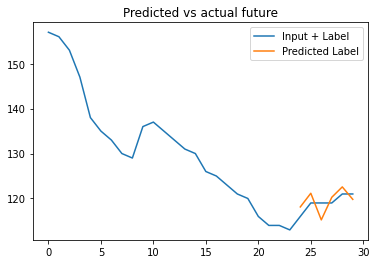

[Training:85] Total Loss: 0.55 Loss: 0.56: 100%|██████████| 95/95 [00:20<00:00,  4.63it/s]


tensor([0.3048, 0.2928, 0.2968, 0.3111, 0.2732, 0.2936], device='cuda:0',
       grad_fn=<SelectBackward0>) tensor([0.3400, 0.3550, 0.3550, 0.3525, 0.3500, 0.3375], device='cuda:0')


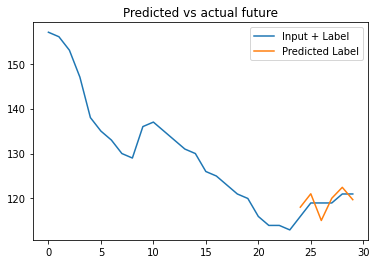

[Training:86] Total Loss: 0.55 Loss: 0.48: 100%|██████████| 95/95 [00:20<00:00,  4.67it/s]

tensor([0.7488, 0.7248, 0.7152, 0.7467, 0.6993, 0.7356], device='cuda:0',
       grad_fn=<SelectBackward0>) tensor([0.7475, 0.7350, 0.7225, 0.6975, 0.6800, 0.6700], device='cuda:0')


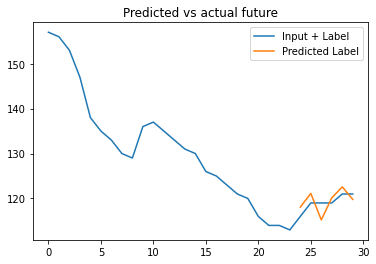

[Training:87] Total Loss: 0.55 Loss: 0.59: 100%|██████████| 95/95 [00:19<00:00,  4.98it/s]


tensor([0.2778, 0.2742, 0.2852, 0.3050, 0.2900, 0.3134], device='cuda:0',
       grad_fn=<SelectBackward0>) tensor([0.2925, 0.2725, 0.2250, 0.2000, 0.1825, 0.1625], device='cuda:0')


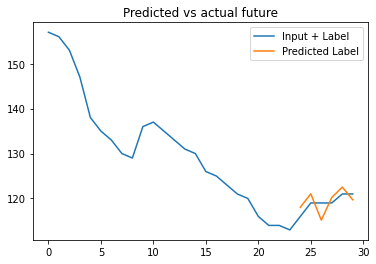

[Training:88] Total Loss: 0.55 Loss: 0.59: 100%|██████████| 95/95 [00:19<00:00,  4.85it/s]

tensor([0.3896, 0.3927, 0.4257, 0.4160, 0.4118, 0.4108], device='cuda:0',
       grad_fn=<SelectBackward0>) tensor([0.5150, 0.5325, 0.5475, 0.5625, 0.5750, 0.5850], device='cuda:0')


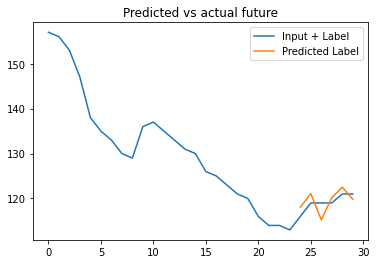

[Training:89] Total Loss: 0.55 Loss: 0.58: 100%|██████████| 95/95 [00:20<00:00,  4.69it/s]


tensor([0.5551, 0.5765, 0.5825, 0.5833, 0.5649, 0.5532], device='cuda:0',
       grad_fn=<SelectBackward0>) tensor([0.5900, 0.5700, 0.5775, 0.5850, 0.5875, 0.5825], device='cuda:0')


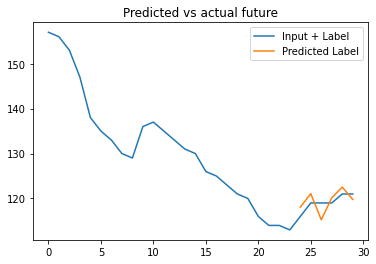

[Training:90] Total Loss: 0.55 Loss: 0.59: 100%|██████████| 95/95 [00:19<00:00,  4.79it/s]


tensor([0.4056, 0.4051, 0.3533, 0.3731, 0.4102, 0.3629], device='cuda:0',
       grad_fn=<SelectBackward0>) tensor([0.3475, 0.3400, 0.3350, 0.3475, 0.3700, 0.3600], device='cuda:0')


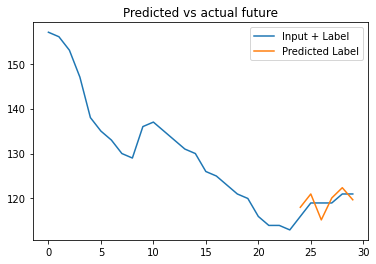

[Training:91] Total Loss: 0.55 Loss: 0.55: 100%|██████████| 95/95 [00:19<00:00,  4.79it/s]


tensor([0.3550, 0.3888, 0.3796, 0.4326, 0.4240, 0.4221], device='cuda:0',
       grad_fn=<SelectBackward0>) tensor([0.5175, 0.5300, 0.5350, 0.5400, 0.5475, 0.5500], device='cuda:0')


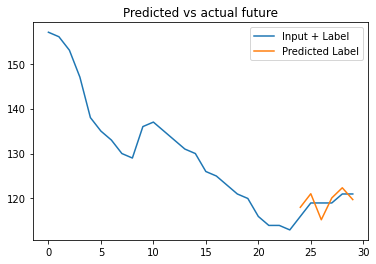

[Training:92] Total Loss: 0.55 Loss: 0.51: 100%|██████████| 95/95 [00:19<00:00,  4.78it/s]


tensor([0.2034, 0.2085, 0.2006, 0.2228, 0.2124, 0.2251], device='cuda:0',
       grad_fn=<SelectBackward0>) tensor([0.2025, 0.2100, 0.2175, 0.2275, 0.2325, 0.2375], device='cuda:0')


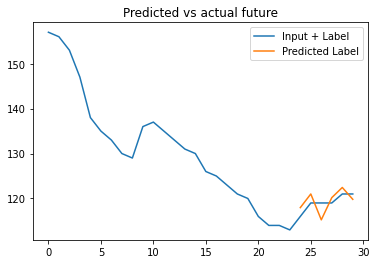

[Training:93] Total Loss: 0.55 Loss: 0.51: 100%|██████████| 95/95 [00:19<00:00,  4.78it/s]


tensor([0.2294, 0.2185, 0.2289, 0.2292, 0.2737, 0.2254], device='cuda:0',
       grad_fn=<SelectBackward0>) tensor([0.2700, 0.2950, 0.3050, 0.2925, 0.2875, 0.2775], device='cuda:0')


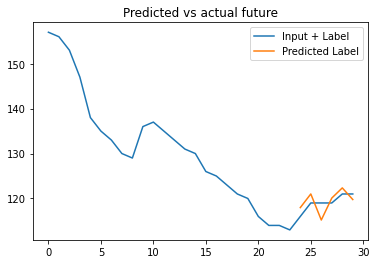

[Training:94] Total Loss: 0.55 Loss: 0.52: 100%|██████████| 95/95 [00:18<00:00,  5.01it/s]


tensor([0.3583, 0.2895, 0.3286, 0.2985, 0.2876, 0.3116], device='cuda:0',
       grad_fn=<SelectBackward0>) tensor([0.3275, 0.3375, 0.3425, 0.3525, 0.3550, 0.3525], device='cuda:0')


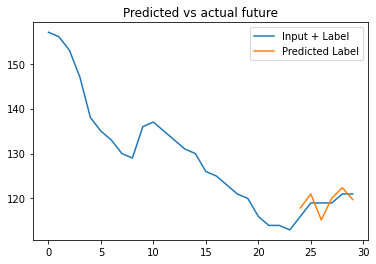

[Training:95] Total Loss: 0.55 Loss: 0.56: 100%|██████████| 95/95 [00:19<00:00,  4.92it/s]


tensor([0.6275, 0.6210, 0.6067, 0.6131, 0.6052, 0.6079], device='cuda:0',
       grad_fn=<SelectBackward0>) tensor([0.6650, 0.6625, 0.6675, 0.6700, 0.6925, 0.7150], device='cuda:0')


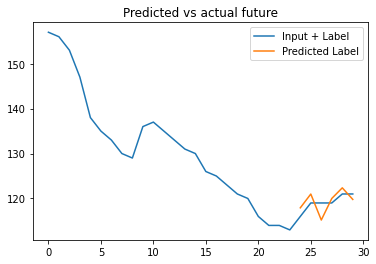

[Training:96] Total Loss: 0.55 Loss: 0.54: 100%|██████████| 95/95 [00:19<00:00,  4.80it/s]


tensor([0.2290, 0.2170, 0.2183, 0.2231, 0.2264, 0.2277], device='cuda:0',
       grad_fn=<SelectBackward0>) tensor([0.2375, 0.2525, 0.2700, 0.3025, 0.3225, 0.3300], device='cuda:0')


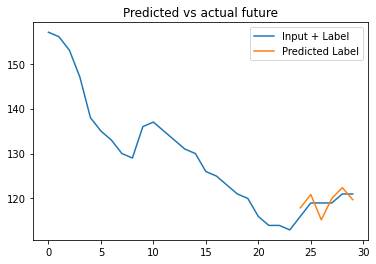

[Training:97] Total Loss: 0.55 Loss: 0.52: 100%|██████████| 95/95 [00:19<00:00,  4.99it/s]

tensor([0.2017, 0.2010, 0.1908, 0.2074, 0.2122, 0.2141], device='cuda:0',
       grad_fn=<SelectBackward0>) tensor([0.1675, 0.1650, 0.1675, 0.1750, 0.1825, 0.1900], device='cuda:0')


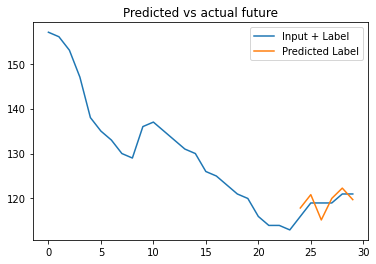

[Training:98] Total Loss: 0.55 Loss: 0.58: 100%|██████████| 95/95 [00:20<00:00,  4.73it/s]


tensor([0.3300, 0.3324, 0.3281, 0.3484, 0.3358, 0.3259], device='cuda:0',
       grad_fn=<SelectBackward0>) tensor([0.3850, 0.4000, 0.4125, 0.4200, 0.4325, 0.4475], device='cuda:0')


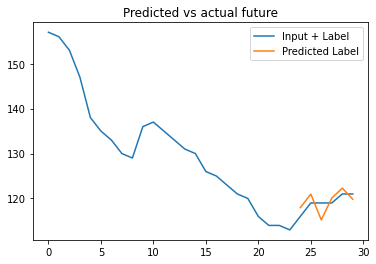

[Training:99] Total Loss: 0.55 Loss: 0.55: 100%|██████████| 95/95 [00:19<00:00,  4.97it/s]


tensor([0.2498, 0.2558, 0.2945, 0.3145, 0.2895, 0.3153], device='cuda:0',
       grad_fn=<SelectBackward0>) tensor([0.3650, 0.3825, 0.3975, 0.4100, 0.4175, 0.4250], device='cuda:0')


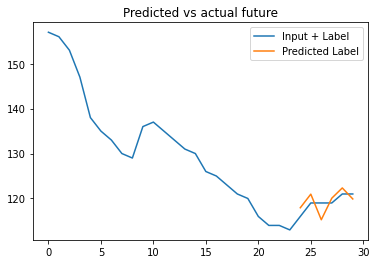

[Training:100] Total Loss: 0.55 Loss: 0.58: 100%|██████████| 95/95 [00:20<00:00,  4.70it/s]


tensor([0.3871, 0.4086, 0.3941, 0.3921, 0.3760, 0.4234], device='cuda:0',
       grad_fn=<SelectBackward0>) tensor([0.3900, 0.3925, 0.3900, 0.3925, 0.3925, 0.3975], device='cuda:0')


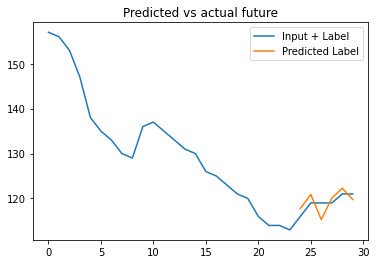

[Training:101] Total Loss: 0.55 Loss: 0.52: 100%|██████████| 95/95 [00:20<00:00,  4.70it/s]


tensor([0.3089, 0.3099, 0.3252, 0.3100, 0.3236, 0.3284], device='cuda:0',
       grad_fn=<SelectBackward0>) tensor([0.3225, 0.3250, 0.3250, 0.3250, 0.3250, 0.3275], device='cuda:0')


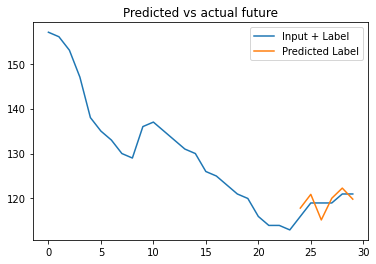

[Training:102] Total Loss: 0.55 Loss: 0.55: 100%|██████████| 95/95 [00:20<00:00,  4.75it/s]


tensor([0.7155, 0.6734, 0.6616, 0.7141, 0.6547, 0.7089], device='cuda:0',
       grad_fn=<SelectBackward0>) tensor([0.7225, 0.7325, 0.6850, 0.6950, 0.7000, 0.6975], device='cuda:0')


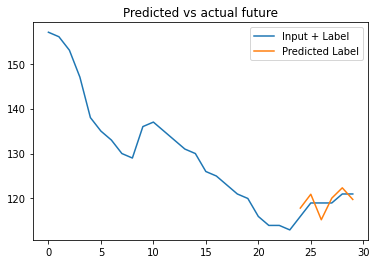

[Training:103] Total Loss: 0.55 Loss: 0.54: 100%|██████████| 95/95 [00:19<00:00,  4.78it/s]


tensor([0.4455, 0.4268, 0.4554, 0.4275, 0.4022, 0.3811], device='cuda:0',
       grad_fn=<SelectBackward0>) tensor([0.3525, 0.3575, 0.3650, 0.3850, 0.4100, 0.4125], device='cuda:0')


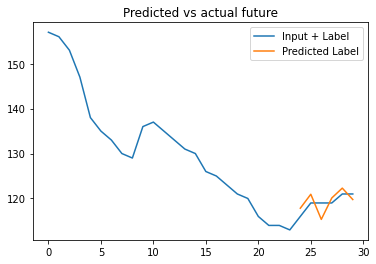

[Training:104] Total Loss: 0.55 Loss: 0.54: 100%|██████████| 95/95 [00:19<00:00,  4.84it/s]


tensor([0.3008, 0.2707, 0.2666, 0.2661, 0.3364, 0.2298], device='cuda:0',
       grad_fn=<SelectBackward0>) tensor([0.2775, 0.2850, 0.2975, 0.3000, 0.2950, 0.2875], device='cuda:0')


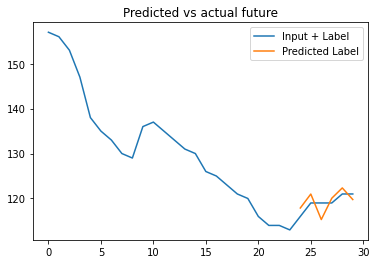

[Training:105] Total Loss: 0.55 Loss: 0.50: 100%|██████████| 95/95 [00:19<00:00,  4.77it/s]


tensor([0.5374, 0.5347, 0.5219, 0.5157, 0.5118, 0.5108], device='cuda:0',
       grad_fn=<SelectBackward0>) tensor([0.5600, 0.5550, 0.5400, 0.5450, 0.5525, 0.5625], device='cuda:0')


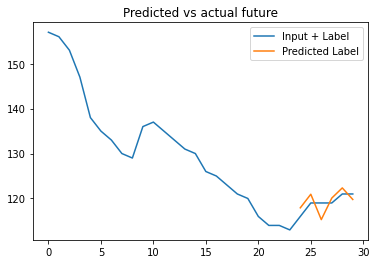

[Training:106] Total Loss: 0.55 Loss: 0.54: 100%|██████████| 95/95 [00:20<00:00,  4.71it/s]


tensor([0.5074, 0.4875, 0.5027, 0.5208, 0.5323, 0.5206], device='cuda:0',
       grad_fn=<SelectBackward0>) tensor([0.4725, 0.4525, 0.4400, 0.4325, 0.4300, 0.4400], device='cuda:0')


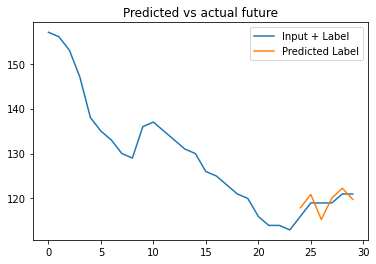

[Training:107] Total Loss: 0.55 Loss: 0.58: 100%|██████████| 95/95 [00:19<00:00,  4.79it/s]


tensor([0.4106, 0.4062, 0.4262, 0.4618, 0.4404, 0.4228], device='cuda:0',
       grad_fn=<SelectBackward0>) tensor([0.4525, 0.4475, 0.4425, 0.4375, 0.4350, 0.4325], device='cuda:0')


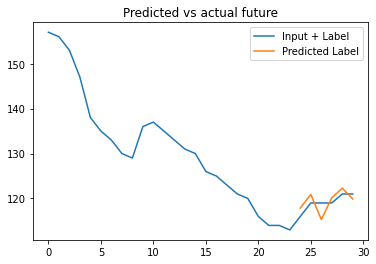

[Training:108] Total Loss: 0.55 Loss: 0.54: 100%|██████████| 95/95 [00:19<00:00,  4.99it/s]


tensor([0.3290, 0.3545, 0.3257, 0.3401, 0.3620, 0.3386], device='cuda:0',
       grad_fn=<SelectBackward0>) tensor([0.3325, 0.3275, 0.3275, 0.3425, 0.3700, 0.3625], device='cuda:0')


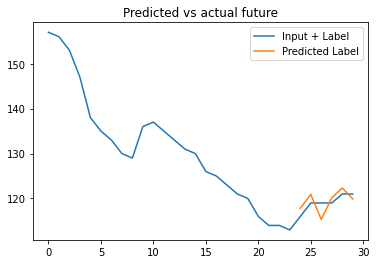

[Training:109] Total Loss: 0.55 Loss: 0.58: 100%|██████████| 95/95 [00:20<00:00,  4.71it/s]


tensor([0.5428, 0.5554, 0.5132, 0.5336, 0.5823, 0.5047], device='cuda:0',
       grad_fn=<SelectBackward0>) tensor([0.4750, 0.4850, 0.4975, 0.5150, 0.5275, 0.5375], device='cuda:0')


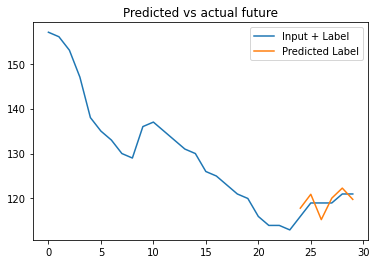

[Training:110] Total Loss: 0.55 Loss: 0.53: 100%|██████████| 95/95 [00:19<00:00,  4.92it/s]


tensor([0.4759, 0.4796, 0.4601, 0.4633, 0.4618, 0.4704], device='cuda:0',
       grad_fn=<SelectBackward0>) tensor([0.5125, 0.5125, 0.5125, 0.5150, 0.5200, 0.5200], device='cuda:0')


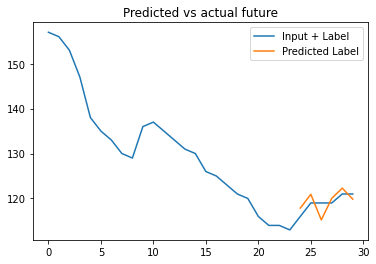

[Training:111] Total Loss: 0.52 Loss: 0.59:  94%|█████████▎| 89/95 [00:18<00:01,  4.70it/s]


KeyboardInterrupt: 

In [ ]:
torch.autograd.set_detect_anomaly(False)
loss_function = nn.MSELoss()
best_val_loss = torch.inf
stopping_counter = 0
for epoch in range(epochs):
    total_loss = 0
    with torch.no_grad():
        x, y, inp = val_data.get_first_example()
        x = torch.tensor(x).unsqueeze(0)
        x = prepare_data(x).to(device)
        model.eval()
        y_pred = model(x)[0].cpu().numpy()
        model.train()
        fig = plot_example(y, y_pred, inp, scale_factor=train_data.scale_max["cbg"])
        plt.show()
        with tqdm(val_loader) as t:
            for x, y, mask in t:
                x = prepare_data(x).to(device)
                y = y.to(device)
                y_pred = model(x)
                loss = model.calculate_loss(y)
                total_loss += loss.item()
                t.set_description(f"[Validation:{epoch - 1}] Total Loss: {total_loss / len(val_loader):.2f} Loss: {loss.item():.2f}")
    if total_loss < best_val_loss:
        torch.save(model.state_dict(), f"checkpoints/nbeats_best_{output_dim}.chkpt")
        stopping_counter = 0
    else: 
        stopping_counter += 1
        if stopping_counter >= early_stopping_counter:
            break
    total_loss = 0
    with tqdm(train_loader) as t:
        for x, y, mask in t:
            x = prepare_data(x).to(device)

            y = y.to(device)
            y_pred = model(x)
            loss = model.calculate_loss(y)
            total_loss += loss.item()
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
            t.set_description(f"[Training:{epoch}] Total Loss: {total_loss / len(train_loader):.2f} Loss: {loss.item():.2f}")
        print(y_pred[0], y[0])
    scheduler.step()
    scheduler2.step()
            

# Evaluate on test set
* Calculate the rMSE and MAE values for 30min/60min prediction horizon

In [ ]:
test_data = OhioData(mode="test", n=output_dim)
test_loader = DataLoader(test_data, batch_size=1, num_workers=0)

mse_loss = nn.MSELoss()

model = NBeats(n_blocks=n_blocks, input_dim=input_dim, parameter_dim=n_features, output_dim=output_dim, amount_fc=amount_fc, hidden_dim=hidden_dim).to(device)
model.load_state_dict(torch.load(f"checkpoints/nbeats_{output_dim}_best.chkpt"))
model = model.eval().to(device)

In [ ]:
total_loss = 0

with torch.no_grad():
    with tqdm(test_loader) as t:
        for x, y, mask in t:
            x = prepare_data(x).to(device)
            y = y.to(device)
            y_pred = model(x)
            # scale back to original range, because otherwise the results cannot bne compared to others
            y = y * train_data.scale_max["cbg"]
            y_pred = y_pred * train_data.scale_max["cbg"]
            loss = mse_loss(y_pred, y)
            total_loss += loss.item()
            t.set_description(f"Test Loss: {torch.sqrt(total_loss / len(test_loader)):.2f}, Running Loss: {loss.item():.2f}")

print(f"Final rMSE: {torch.sqrt(total_loss / len(test_loader))}")


Test Loss: 22.15, Running Loss: 8.88: 100%|██████████| 28426/28426 [01:49<00:00, 260.01it/s]  

Final MSE: 22.14898569707145


# Evaluate results per patient

In [ ]:
patient_ids = [559, 563, 570, 575, 588, 591, 540, 544, 552, 567, 584, 596]

mse_loss = nn.MSELoss()
mae_loss = nn.L1Loss()

In [ ]:
maes = []
mses = []
with torch.no_grad():
    for id in patient_ids:
        total_mae = 0
        total_mse = 0
        test_data = OhioData(mode="test", patient_id=id)
        test_loader = DataLoader(test_data, batch_size=1, num_workers=0)
        with tqdm(test_loader) as t:
            for x, y, mask in t:
                x = prepare_data(x).to(device)
                y = y.to(device)
                y_pred = model(x)
                y = y * train_data.scale_max["cbg"]
                y_pred = y_pred * train_data.scale_max["cbg"]
                mse = mse_loss(y_pred, y)
                mae = mae_loss(y_pred, y)
                total_mae += mae.item()
                total_mse += mse.item()
                t.set_description(f"Patient: {id}, MSE: {np.sqrt(total_mse / len(test_loader)):.2f}, MAE: {total_mae / len(test_loader):.2f}")
        print(f"Results - Patient: {id}, rMSE: {np.sqrt(total_mse / len(test_loader)):.2f}, MAE: {total_mae / len(test_loader):.2f}")
        maes.append(total_mae / len(test_loader))
        mses.append(total_mse / len(test_loader))
print(f"Mean results - MAE: {sum(maes) / len(maes)}, rMSE: {np.sqrt(sum(mses) / len(mses))}")

    

Patient: 559, MSE: 28.83, MAE: 20.84: 100%|██████████| 2142/2142 [00:10<00:00, 205.61it/s]


Results - Patient: 559, rMSE: 28.83, MAE: 20.84


Patient: 563, MSE: 24.96, MAE: 18.64: 100%|██████████| 2446/2446 [00:11<00:00, 210.71it/s]


Results - Patient: 563, rMSE: 24.96, MAE: 18.64


Patient: 570, MSE: 24.20, MAE: 18.52: 100%|██████████| 2435/2435 [00:11<00:00, 206.57it/s]


Results - Patient: 570, rMSE: 24.20, MAE: 18.52


Patient: 575, MSE: 26.90, MAE: 19.57: 100%|██████████| 2249/2249 [00:10<00:00, 207.77it/s]


Results - Patient: 575, rMSE: 26.90, MAE: 19.57


Patient: 588, MSE: 26.03, MAE: 19.03: 100%|██████████| 2698/2698 [00:13<00:00, 200.21it/s]


Results - Patient: 588, rMSE: 26.03, MAE: 19.03


Patient: 591, MSE: 25.76, MAE: 19.76: 100%|██████████| 2605/2605 [00:12<00:00, 212.05it/s]


Results - Patient: 591, rMSE: 25.76, MAE: 19.76


Patient: 540, MSE: 34.74, MAE: 26.04: 100%|██████████| 2617/2617 [00:12<00:00, 206.50it/s]


Results - Patient: 540, rMSE: 34.74, MAE: 26.04


Patient: 544, MSE: 24.36, MAE: 18.58: 100%|██████████| 2499/2499 [00:12<00:00, 205.94it/s]


Results - Patient: 544, rMSE: 24.36, MAE: 18.58


Patient: 552, MSE: 25.24, MAE: 18.59: 100%|██████████| 2023/2023 [00:09<00:00, 205.34it/s]


Results - Patient: 552, rMSE: 25.24, MAE: 18.59


Patient: 567, MSE: 31.78, MAE: 23.35: 100%|██████████| 2017/2017 [00:09<00:00, 213.17it/s]


Results - Patient: 567, rMSE: 31.78, MAE: 23.35


Patient: 584, MSE: 30.27, MAE: 22.77: 100%|██████████| 2169/2169 [00:10<00:00, 202.83it/s]


Results - Patient: 584, rMSE: 30.27, MAE: 22.77


Patient: 596, MSE: 24.59, MAE: 18.34: 100%|██████████| 2526/2526 [00:11<00:00, 210.56it/s]

Results - Patient: 596, rMSE: 24.59, MAE: 18.34
Mean results - MAE: 20.335958105364494, rMSE: 27.495768930222788


# Vizualize the predictions

## NOTE(!!!)

* all time steps where missing_cbg == True, the data is removed

In [ ]:
def plot_point(y, y_pred, model_name):
    fig, ax = plt.subplots(1)
    line = ax.plot(y, label="Groud Truth")
    line = ax.plot(y_pred, label="Prediction")
    _ = ax.set_title(f"Prediction vs Ground truth with model {model_name}")
    _ = ax.set_ylabel("mg/dL")
    _ = ax.set_xlabel("5min timesteps")

    legend = ax.legend()
    return fig

100%|██████████| 2142/2142 [00:05<00:00, 412.36it/s]


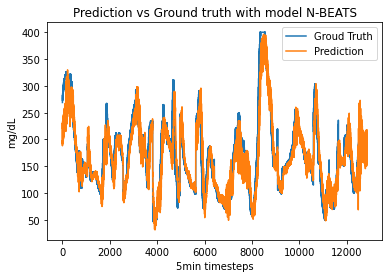

100%|██████████| 2446/2446 [00:05<00:00, 414.09it/s]


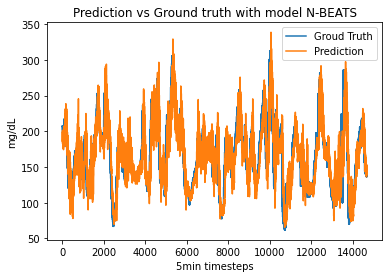

100%|██████████| 2435/2435 [00:05<00:00, 414.33it/s]


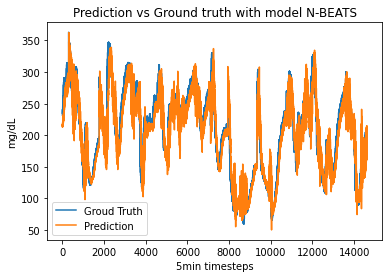

100%|██████████| 2249/2249 [00:05<00:00, 413.56it/s]


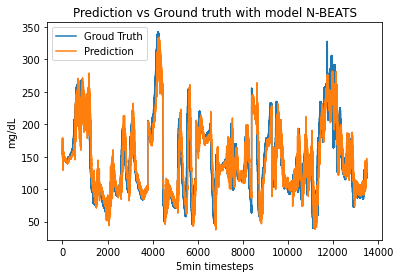

100%|██████████| 2698/2698 [00:06<00:00, 415.61it/s]


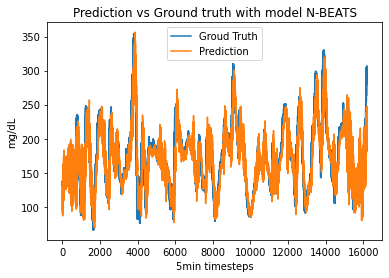

100%|██████████| 2605/2605 [00:06<00:00, 413.34it/s]


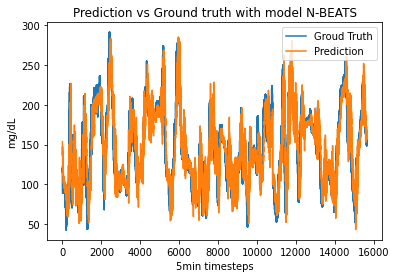

100%|██████████| 2617/2617 [00:06<00:00, 411.12it/s]


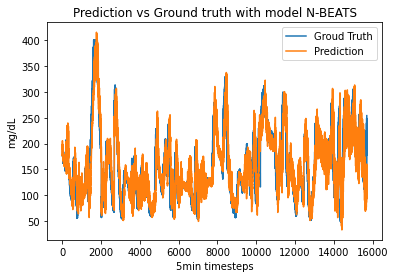

100%|██████████| 2499/2499 [00:06<00:00, 412.35it/s]


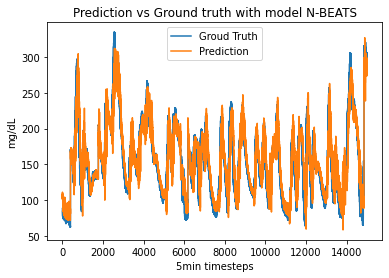

100%|██████████| 2023/2023 [00:04<00:00, 414.73it/s]


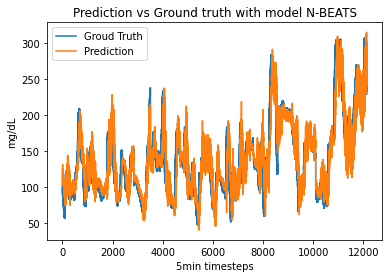

100%|██████████| 2017/2017 [00:04<00:00, 412.53it/s]


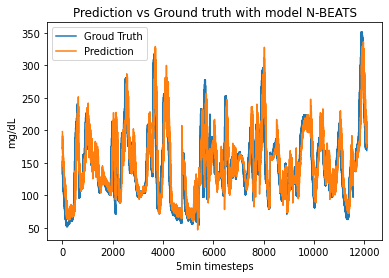

100%|██████████| 2169/2169 [00:05<00:00, 401.74it/s]


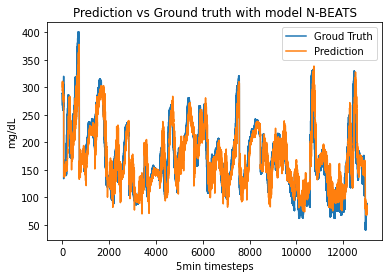

100%|██████████| 2526/2526 [00:06<00:00, 400.05it/s]


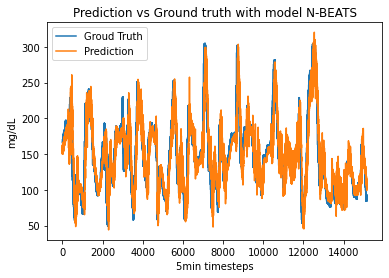

In [ ]:
# plot_point([1,2,3,4], [2,3,4,5], "N-BEATS")

for id in patient_ids:
    test_data = OhioData(mode="test", patient_id=id)
    test_loader = DataLoader(test_data, batch_size=1, num_workers=0)
    y_values = []
    y_pred_values = []
    with torch.no_grad():
        with tqdm(test_loader) as t:
            for x, y, mask in t:
                x = prepare_data(x).to(device)
                y = y.to(device)
                y_pred = model(x)
                y = y * train_data.scale_max["cbg"]
                y_pred = y_pred * train_data.scale_max["cbg"]
                y_values.extend(y[0].tolist())
                y_pred_values.extend(y_pred[0].tolist())
                
    fig = plot_point(y_values, y_pred_values, "N-BEATS")
    plt.show(fig)